/Users/yumengxu/miniforge3/envs/pycwb/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


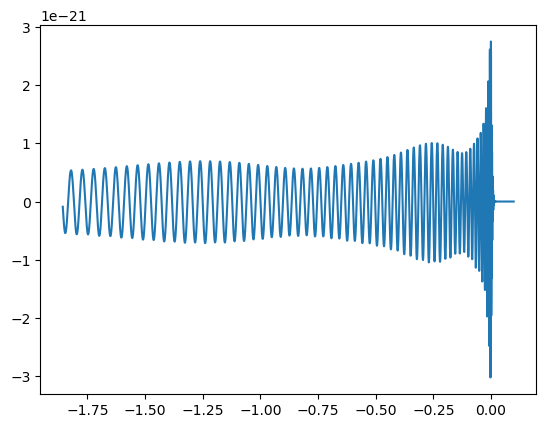

In [1]:
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

hp, hc = get_td_waveform(approximant="IMRPhenomTPHM",
                         mass1=20,
                         mass2=20,
                         spin1x=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         distance=100,
                         delta_t=1.0/2048,
                         f_lower=20)

hp.plot()
plt.show()

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

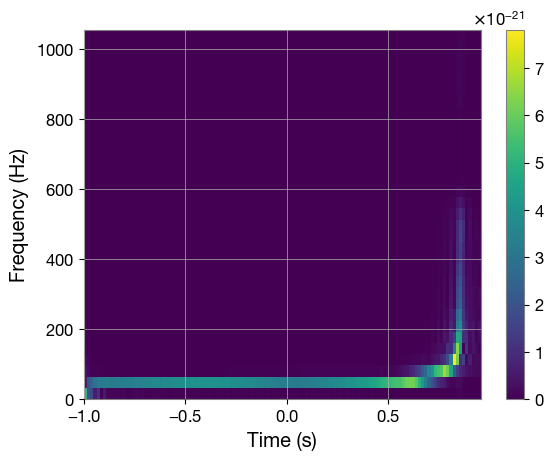

In [2]:
from wdm_wavelet.wdm import WDM

wdm = WDM(32, 64, 6, 10)

tf_map = wdm.t2w(hp)

tf_map.plot_energy()

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

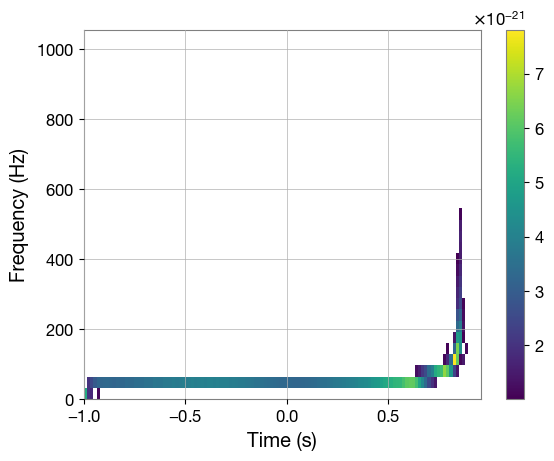

In [3]:
tf_map.plot_energy(low_cut=1e-21)

(-0.1, 0.1)

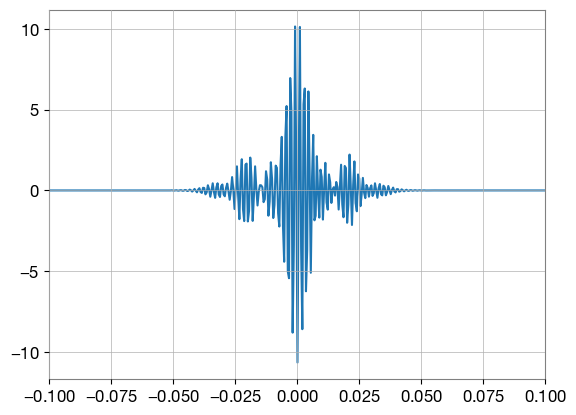

In [4]:
from burst_waveform.models import WhiteNoiseBurst
from wdm_wavelet.wdm import WDM
params = {
    'frequency': 500,
    'bandwidth': 100,
    'duration': 0.02,
    'inj_length': 1,
    'mode': 1,
    'seed': 1234,
    'sample_rate': 2048,
}

WNB = WhiteNoiseBurst(params)
wnb_strain = WNB()

import matplotlib.pyplot as plt

plt.plot(wnb_strain)
plt.xlim(-0.1, 0.1)

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

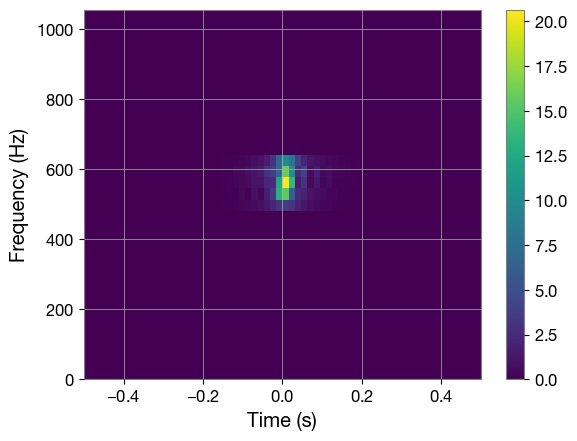

In [5]:
wdm = WDM(32, 64, 6, 10)

tf_map = wdm.t2w(wnb_strain)

tf_map.plot_energy()